Generating sample data...
Generated data with 100 samples and 2 features.
First 5 data points:
[[-7.55706217 -8.09198737]
 [ 5.29069261  0.98847823]
 [-2.88477713  9.44833416]
 [ 5.76211428  0.85168883]
 [-6.5933973  -6.43148197]]

Computing linkage matrix using 'ward' method and 'euclidean' metric...
Linkage matrix shape: (99, 4)
First 5 rows of linkage matrix:
[[1.60000000e+01 5.30000000e+01 3.86994397e-02 2.00000000e+00]
 [5.70000000e+01 8.50000000e+01 4.55897763e-02 2.00000000e+00]
 [7.00000000e+00 3.20000000e+01 4.95314443e-02 2.00000000e+00]
 [6.10000000e+01 8.10000000e+01 6.51144926e-02 2.00000000e+00]
 [4.70000000e+01 7.10000000e+01 6.92263352e-02 2.00000000e+00]]


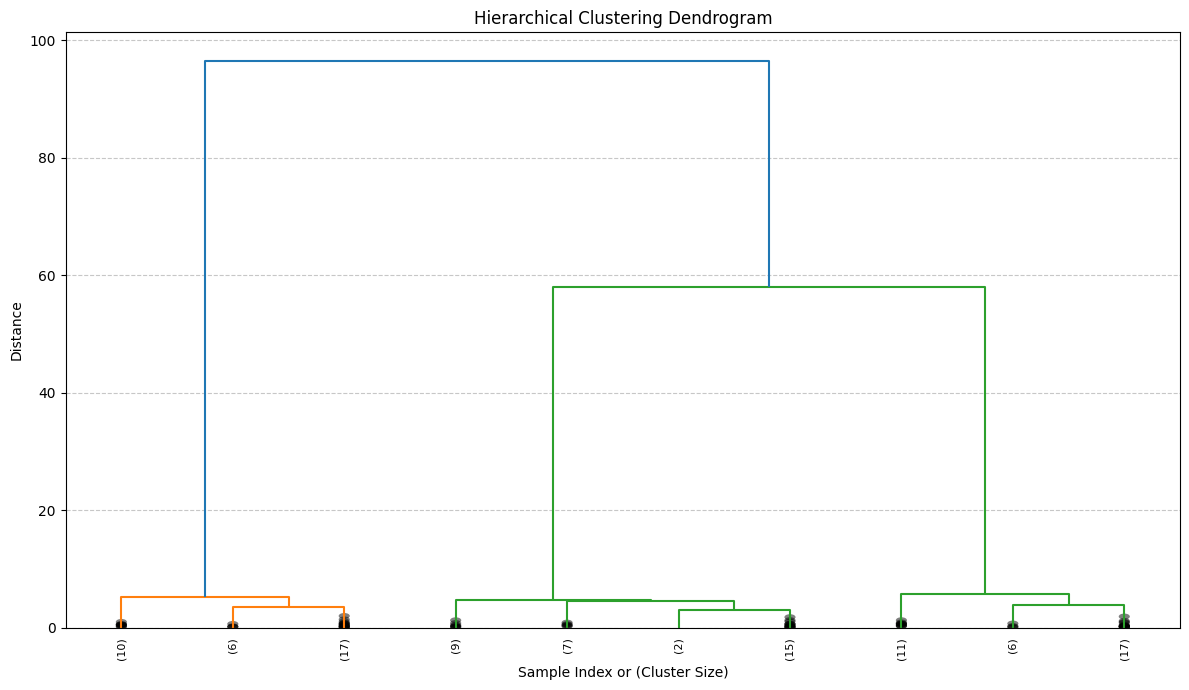


Forming clusters: aiming for 3 clusters (maxclust criterion)
Clusters formed using maxclust=3:
[1 2 3 2 1 2 3 2 2 3]...
Number of unique clusters found: 3

Forming clusters: aiming for a distance threshold (distance criterion)
Clusters formed using distance_threshold=4.0:
[1 4 7 4 2 3 6 5 5 7]...
Number of unique clusters found: 7


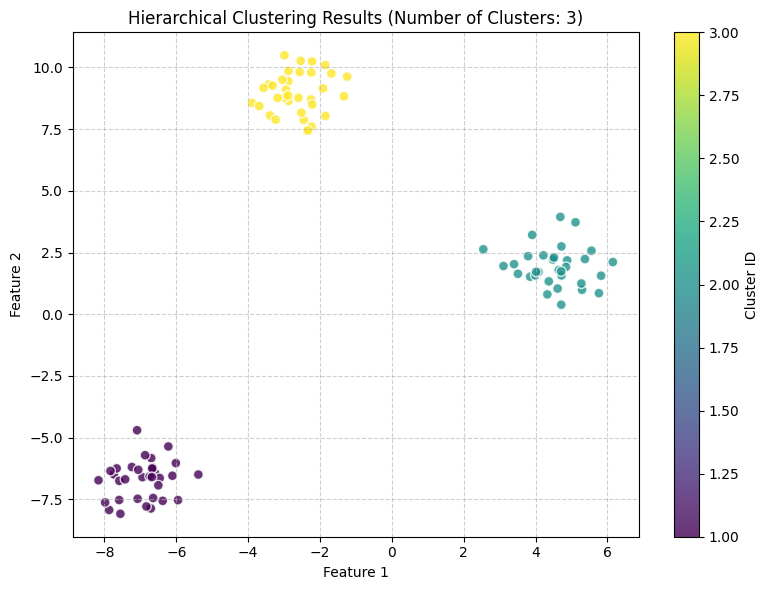


Hierarchical clustering program completed.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.datasets import make_blobs

# --- 1. Generate Sample Data ---
# We'll create a synthetic dataset with 100 samples and 2 features,
# designed to have 3 distinct 'blobs' or clusters.
print("Generating sample data...")
n_samples = 100
n_features = 2
n_centers = 3
random_state = 42 # for reproducibility

# X will be the data points, y will be the true labels (for evaluation, not used in clustering itself)
X, y = make_blobs(n_samples=n_samples, n_features=n_features,
                  centers=n_centers, cluster_std=0.8, random_state=random_state)

print(f"Generated data with {X.shape[0]} samples and {X.shape[1]} features.")
print(f"First 5 data points:\n{X[:5]}")

# --- 2. Compute the Linkage Matrix ---
# The linkage function performs the hierarchical clustering.
# 'method' specifies the linkage criterion (e.g., 'ward', 'complete', 'average', 'single').
# 'ward' minimizes the variance within each cluster.
# 'metric' specifies the distance metric (e.g., 'euclidean', 'manhattan').
print("\nComputing linkage matrix using 'ward' method and 'euclidean' metric...")
Z = linkage(X, method='ward', metric='euclidean')

# The linkage matrix Z has the following format for each row [idx1, idx2, distance, no. of original observations]:
# idx1, idx2: the indices of the two clusters being merged (if < n_samples, they are original points)
# distance: the distance between the two merged clusters
# no. of original observations: the number of original data points in the new cluster

print(f"Linkage matrix shape: {Z.shape}")
print(f"First 5 rows of linkage matrix:\n{Z[:5]}")

# --- 3. Plot the Dendrogram ---
# A dendrogram visualizes the hierarchical clustering process.
# It shows how individual data points are merged into clusters.
plt.figure(figsize=(12, 7))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')

# truncate_mode='lastp' shows only the last 'p' merged clusters.
# p=10 means it will show the last 10 merges, and any deeper merges will be summarized.
# show_leaf_counts=True displays the number of original observations in each leaf node
dendrogram(Z,
           truncate_mode='lastp',  # show only the last p merged clusters
           p=10,                   # show only the last 10 merges
           show_leaf_counts=True,  # show the number of original observations in the leaf node
           leaf_rotation=90.,      # rotates the x axis labels
           leaf_font_size=8.,      # font size for the x axis labels
           show_contracted=True    # displays the internal nodes
          )
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- 4. Form Clusters from the Dendrogram ---
# We can use the fcluster function to extract flat clusters from the hierarchical clustering.
# 't' is the threshold value for cutting the dendrogram.
# 'criterion' specifies how 't' is interpreted (e.g., 'maxclust' for number of clusters,
# 'distance' for a maximum distance threshold).

# Example 1: Cut the dendrogram to get a specific number of clusters (e.g., 3 clusters)
print("\nForming clusters: aiming for 3 clusters (maxclust criterion)")
max_clusters = 3
clusters_maxclust = fcluster(Z, t=max_clusters, criterion='maxclust')
print(f"Clusters formed using maxclust={max_clusters}:\n{clusters_maxclust[:10]}...")
print(f"Number of unique clusters found: {np.unique(clusters_maxclust).size}")

# Example 2: Cut the dendrogram at a specific distance threshold
# You would determine this threshold by looking at the dendrogram.
# For demonstration, let's pick a distance that would likely yield 3 clusters for our data.
# Note: The actual distance depends on your data and linkage method.
print("\nForming clusters: aiming for a distance threshold (distance criterion)")
distance_threshold = 4.0 # This value is arbitrary; adjust based on dendrogram
clusters_distance = fcluster(Z, t=distance_threshold, criterion='distance')
print(f"Clusters formed using distance_threshold={distance_threshold}:\n{clusters_distance[:10]}...")
print(f"Number of unique clusters found: {np.unique(clusters_distance).size}")

# For visualization, let's use the 'maxclust' result.
final_clusters = clusters_maxclust

# --- 5. Visualize the Clustered Data ---
plt.figure(figsize=(8, 6))
plt.title(f'Hierarchical Clustering Results (Number of Clusters: {np.unique(final_clusters).size})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot each data point, colored by its assigned cluster
# 'cmap' defines the colormap for distinguishing clusters
scatter = plt.scatter(X[:, 0], X[:, 1], c=final_clusters, cmap='viridis', s=50, alpha=0.8, edgecolors='w')
plt.colorbar(scatter, label='Cluster ID')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print("\nHierarchical clustering program completed.")
